In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from sst.sst import SingularSpectrumTransformation

# Data
source: https://github.com/dwicke/TSAT

In [21]:
# url = "https://raw.githubusercontent.com/GrammarViz2/grammarviz2_src/master/data/TEK16.txt"
url = "https://raw.githubusercontent.com/dwicke/TSAT/master/data/twitter_raw.csv"
# url = "https://raw.githubusercontent.com/GrammarViz2/grammarviz2_src/master/data/ecg0606_1.csv"
# url = "https://raw.githubusercontent.com/GrammarViz2/grammarviz2_src/master/data/dutch_power_demand.txt"
df = pd.read_csv(url,header=None)

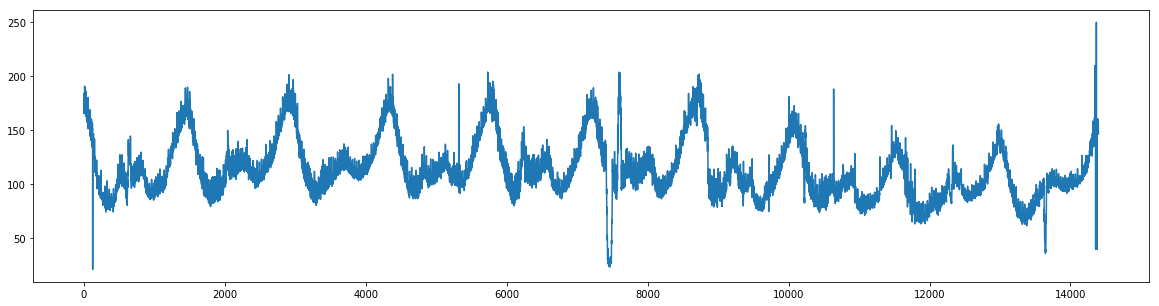

In [23]:
x = df.values[:,0]
plt.figure(figsize=(20,5))
plt.plot(x)

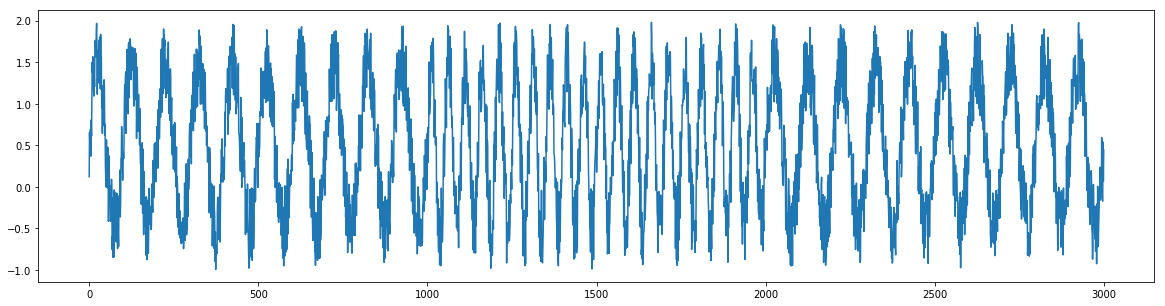

In [17]:
# synthetic (sinusoidal wave & frequency change)
x0 = np.sin(2*np.pi*1*np.linspace(0,10,1000))
x1 = np.sin(2*np.pi*2*np.linspace(0,10,1000))
x2 = np.sin(2*np.pi*1*np.linspace(0,10,1000))
x = np.hstack([x0,x1,x2])
x +=  + np.random.rand(x.size)
plt.figure(figsize=(20,5))
plt.plot(x)

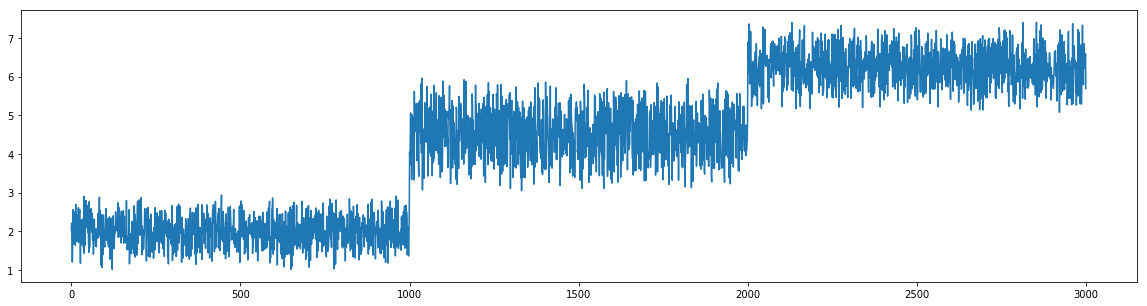

In [19]:
# synthetic (step function)
x0 = 1 * np.ones(1000) + np.random.rand(1000) * 1
x1 = 3 * np.ones(1000) + np.random.rand(1000) * 2
x2 = 5 * np.ones(1000) + np.random.rand(1000) * 1.5
x = np.hstack([x0,x1,x2])
x +=  + np.random.rand(x.size)
plt.figure(figsize=(20,5))
plt.plot(x)

# SST

## timing comparison

In [11]:
# lanczos with jit
from sst.sst import SingularSpectrumTransformation
sst = SingularSpectrumTransformation(50)
%timeit sst.score_offline(x)

382 ms ± 9.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# svd with jit
from sst.sst import SingularSpectrumTransformation
sst = SingularSpectrumTransformation(50,use_lanczos=False)
%timeit sst.score_offline(x)

5.18 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
# lanczos without jit
from sst.sst import SingularSpectrumTransformation
sst = SingularSpectrumTransformation(50)
%timeit sst.score_offline(x)

1.21 s ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
# svd without jit
from sst.sst import SingularSpectrumTransformation
sst = SingularSpectrumTransformation(50,use_lanczos=False)
%timeit sst.score_offline(x)

6.37 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## score comparison

Text(0.5,1,'score')

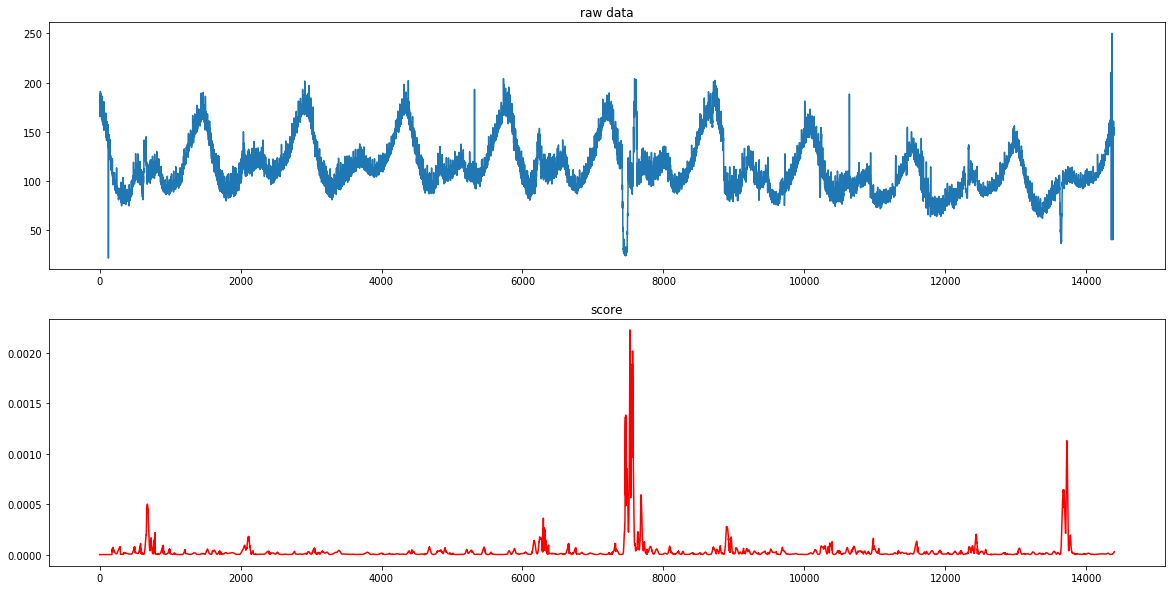

In [24]:
from sst.sst import SingularSpectrumTransformation
score = SingularSpectrumTransformation(70,use_lanczos=True).score_offline(x)
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x); ax[0].set_title("raw data")
ax[1].plot(score,"r"); ax[1].set_title("score")

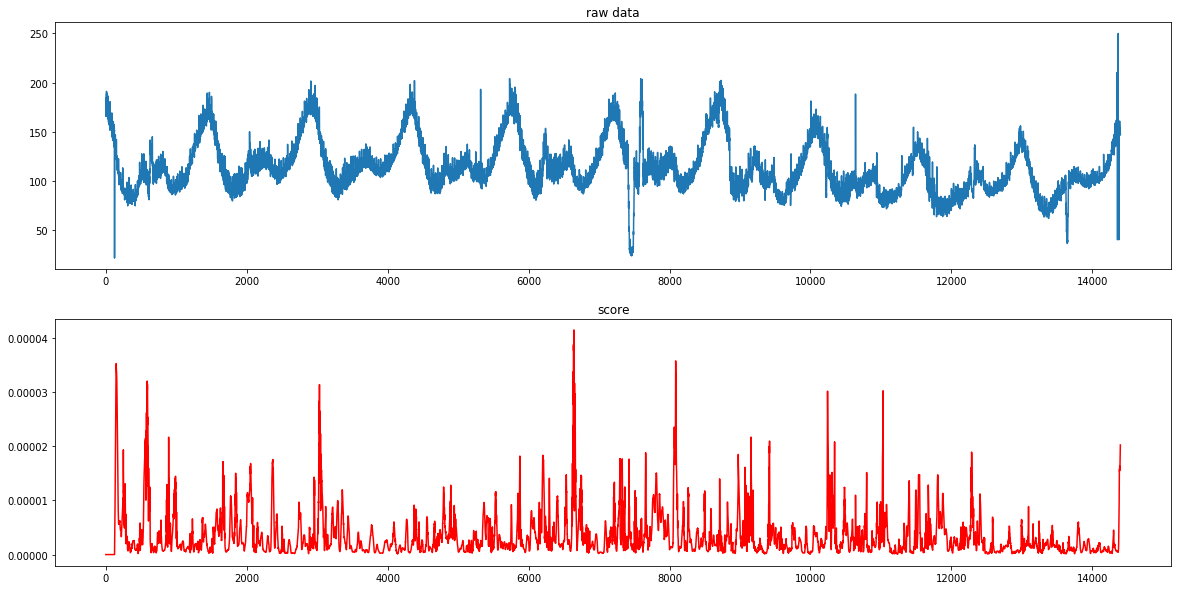

In [78]:
from sst.sst import SingularSpectrumTransformation
score = SingularSpectrumTransformation(50,use_lanczos=False).score_offline(x)
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x); ax[0].set_title("raw data");
ax[1].plot(score,"r"); ax[1].set_title("score");
# plt.ylim(0,0.00025);